# title

## imports and data setup

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit import Model

from seq_tools import structure
from dreem_tools.plotting import *

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [2]:
df = pd.read_json("../C0117_titration_data.json")

## testing lmfit

In [3]:
# Define the two-state model
def two_state_model(x, a, b, c):
    return a + (b-a)/(1 + np.exp(c-x))

# Define the three-state model
def three_state_model(x, a, b, c, d, e):
    return a + (b-a)/(1 + np.exp(c-x)) + (d-b)/(1 + np.exp(e-x))

def normalize_data(data):
    # Compute the minimum and maximum values of the data
    data_min = np.min(data)
    data_max = np.max(data)

    # Compute the range of the data
    data_range = data_max - data_min

    # Normalize the data to the range [0, 1]
    normalized_data = (data - data_min) / data_range

    return normalized_data


In [6]:
# Load titration data
xdata = np.array([0, 1, 2, 3, 4, 5])
ydata = np.array([0, 0.1, 0.25, 0.5, 0.75, 0.9])

# Define the model and parameters
model = Model(two_state_model)
params = model.make_params(a=0, b=1, c=2)

# Perform the fit
result = model.fit(ydata, params, x=xdata)


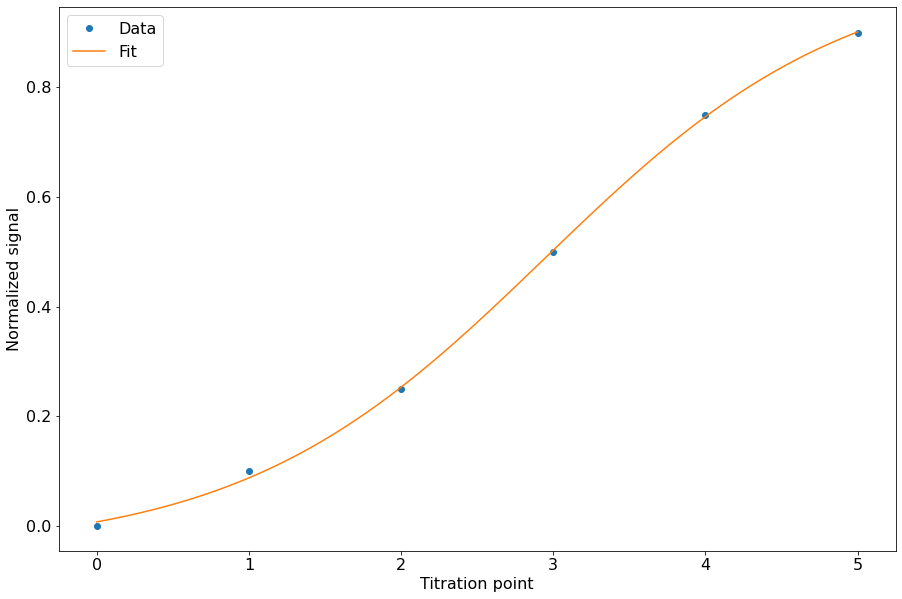

In [7]:
fit_x = np.linspace(0, 5, 100)
fit_y = result.eval(x=fit_x)

# Plot the data and the fit
plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(fit_x, fit_y, label='Fit')
plt.xlabel('Titration point')
plt.ylabel('Normalized signal')
plt.legend()

## test lmfit on actual data

277    40.00
278    15.00
279    10.00
280     7.50
281     6.50
282     5.00
283     3.50
284     2.50
285     1.50
286     1.00
287     0.75
288     0.50
289     0.25
290     0.10
291     0.00
Name: mg_conc, dtype: float64
[[Model]]
    Model(two_state_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 508
    # data points      = 15
    # variables        = 3
    chi-square         = 0.20598427
    reduced chi-square = 0.01716536
    Akaike info crit   = -58.3200854
    Bayesian info crit = -56.1959347
    R-squared          = 0.85446969
[[Variables]]
    a: -6171.11348 +/- 7673761.99 (124349.71%) (init = 1)
    b:  1.04352094 +/- 0.04440966 (4.26%) (init = 1)
    c: -8.94673725 +/- 1243.41242 (13897.94%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = 1.000


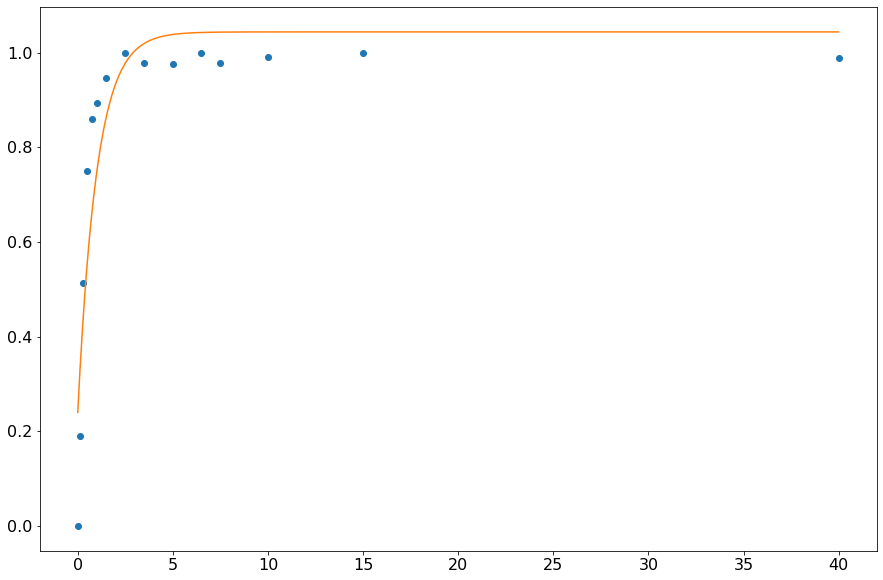

In [8]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
mg_conc = df_sub['mg_conc']
data = -normalize_data(df_sub['tlr_data'].apply(lambda x : x[3])) + 1
print(mg_conc)
# Define the model and parameters
model = Model(two_state_model)
params = model.make_params(a=1, b=1, c=0)

# Perform the fit
result = model.fit(data, params, x=mg_conc)

# Print the fit results
print(result.fit_report())

fit_x = np.linspace(0, 40, 1000)
fit_y = result.eval(x=fit_x)

# Plot the data and the fit
plt.plot(mg_conc, data, 'o', label='Data')
plt.plot(fit_x, fit_y, label='Fit')

## plotting functions

In [9]:
def plot_tlr_res_against_mg2(df, bounds=[3, 10]):
    seq = "CCUAAGUAUGG"
    pal = sns.color_palette("tab10", 11)[::-1]
    colors = pal
    for i in range(bounds[0], bounds[1]):
        # not DMS active
        seq_pos = seq[i-1]
        if seq_pos == 'U' or seq_pos =='G':
            continue
        plt.plot(df_sub["mg_conc"], df_sub['tlr_data'].apply(lambda x : x[i-1]),
                 lw=2, marker='o', markersize=7, color=colors[i], 
                 label=str(i) + " " + seq_pos)
    plt.legend()
    plt.xlabel("mg_conc")
    plt.ylabel("normalized_reactivity")
    
def plot_tlr_res_against_buffer_conc(df, bounds=[3, 10]):
    seq = "CCUAAGUAUGG"
    pal = sns.color_palette("tab10", 11)[::-1]
    colors = pal
    for i in range(bounds[0], bounds[1]):
        # not DMS active
        seq_pos = seq[i-1]
        if seq_pos == 'U' or seq_pos =='G':
            continue
        plt.plot(df_sub["buffer_conc"], df_sub['tlr_data'].apply(lambda x : x[i-1]),
                 lw=2, marker='o', markersize=7, color=colors[i], 
                 label=str(i) + " " + seq_pos)
    plt.legend()
    plt.xlabel("buffer_conc")
    plt.ylabel("normalized_reactivity")
    
    

## test plotting

In [10]:
df.columns

Index(['name', 'sequence', 'structure', 'data_type', 'num_reads', 'num_aligns',
       'data', 'no_mut', '1_mut', '2_mut', '3_mut', '3plus_mut', 'sn', 'dir',
       'rna_name', 'run_name', 'exp_name', 'code', 'length', 'barcode',
       'barcode_seq', 'buffer', 'buffer_conc', 'mg_conc', 'exp_type',
       'ref_hp_5p_as', 'ref_hp_3p_as', 'gaaa_avg', 'tlr_first_a',
       'tlr_second_a', 'ref_hp_as', 'tlr_data', 'kink_turn_data', 'ires_data',
       '3_x_3_data'],
      dtype='object')

In [11]:
df['exp_name'].unique()

array(['2022_08_10_C0117_300mM_NaC_Mg_titra_CM',
       '2022_08_09_C0117_250mM_NaC_Mg_titra_CM',
       '2022_08_08_C0117_200mM_NaC_Mg_titra_CM',
       '2022_07_22_ires_CACGG_CCUACC_NaC_titra_CM_RG',
       '2022_07_29_C0117_150mM_NaC_Mg_titra_CM',
       '2022_07_28_C0117_100mM_NaC_Mg_titra_CM', '2022_07_26_Pur_CM_SJ',
       '2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM',
       '2022_07_25_C0117_NaC_Hep_titra_CM_BL',
       '2022_07_26_C0117_KCl_Tris_titra_CM_BL',
       '2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL',
       '2022_07_18_minittr-6-2HP-ref_NaC_titra_No_MgCl2_CM_RG',
       '2022_07_19_C0117_Hepes_titra_CM_BL',
       '2022_06_21_C0117_buffer_titra_CM_KN',
       '2022_06_28_C0117_timetitra_CM_KN'], dtype=object)

In [12]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]


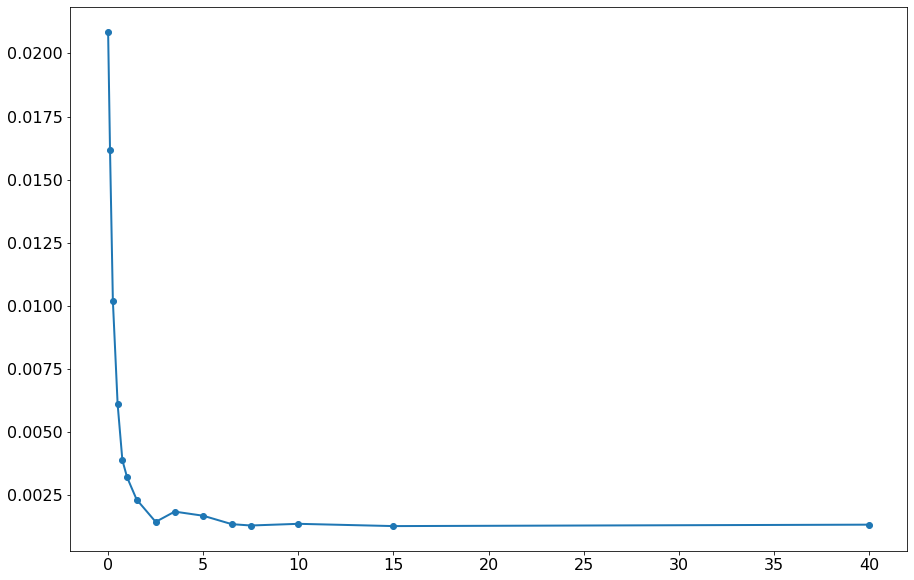

In [14]:
plt.plot(df_sub['mg_conc'], df_sub['gaaa_avg'], lw=2, marker='o')

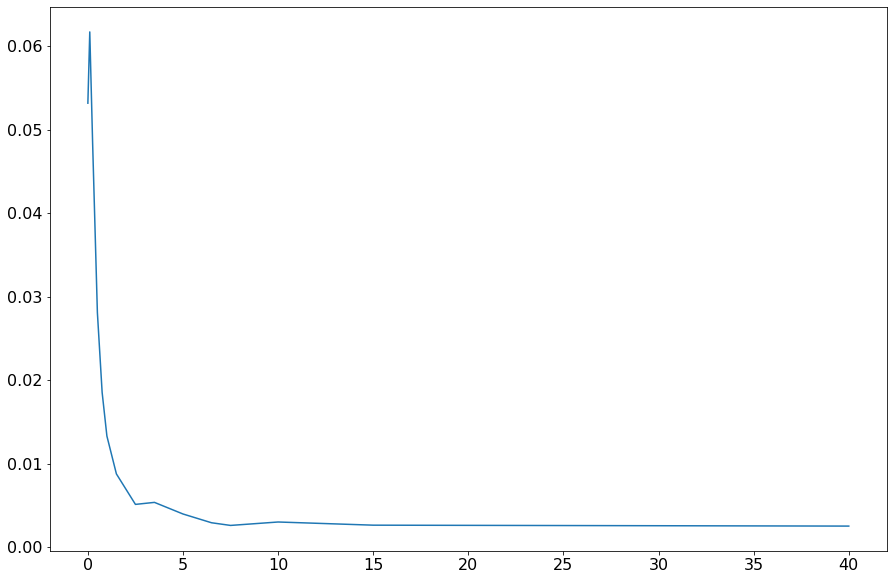

In [8]:
plt.plot(df_sub['mg_conc'], df_sub['tlr_data'].apply(lambda x : x[7]))

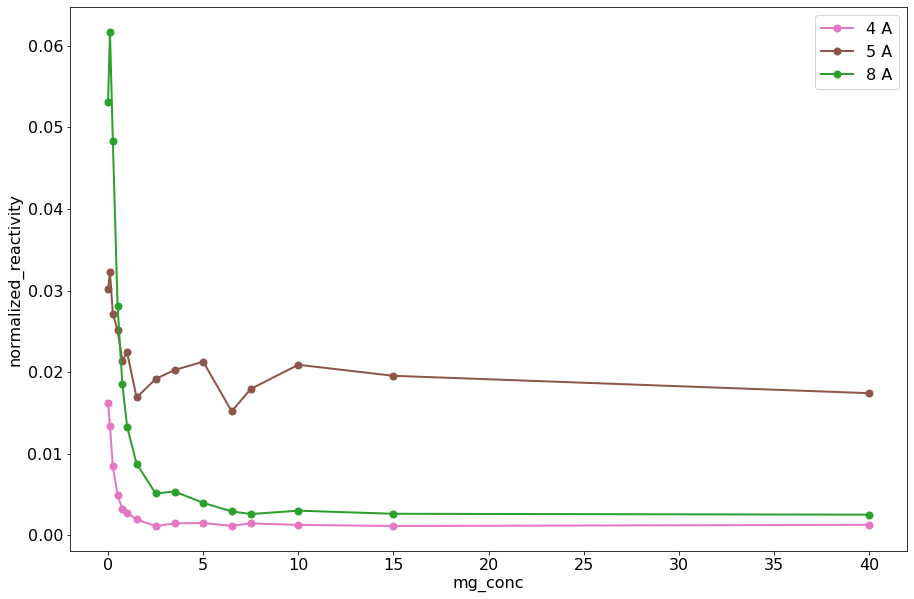

In [9]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_tlr_res_against_mg2(df_sub)


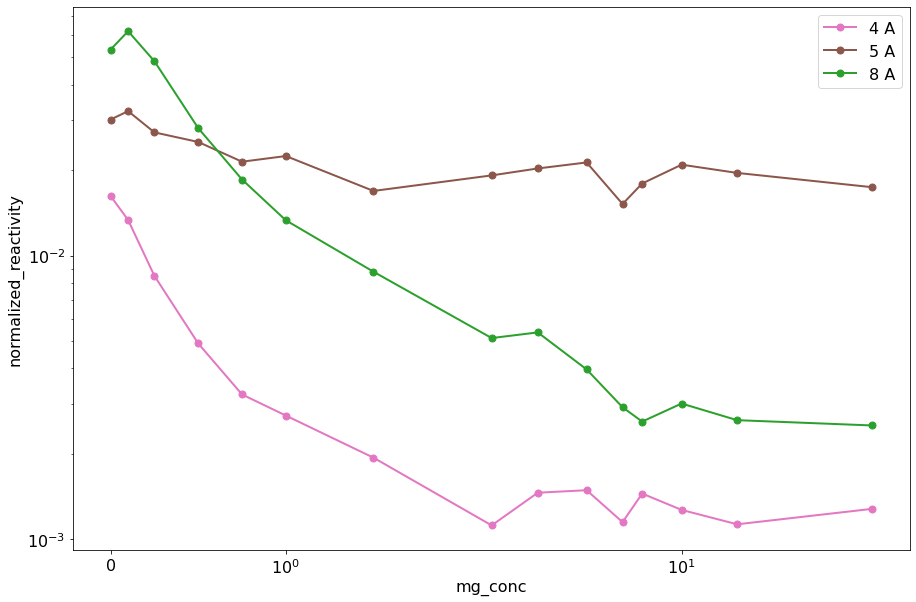

In [10]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

## buffer titration plots

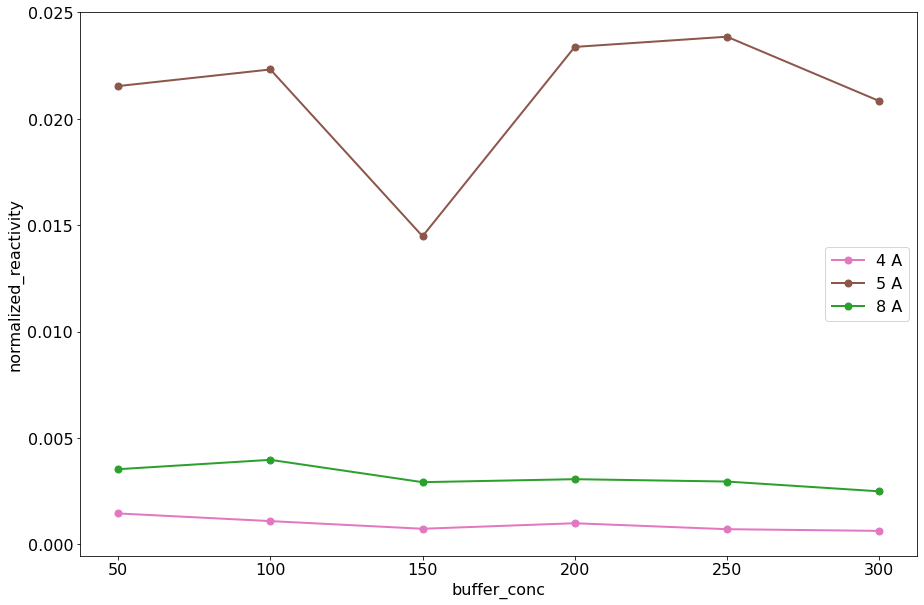

In [11]:
q1 = df["exp_name"] == "2022_07_25_C0117_NaC_Hep_titra_CM_BL"
q2 = df['buffer'] == 'NaCoc'
df_sub = df[q1 & q2]
plot_tlr_res_against_buffer_conc(df_sub)

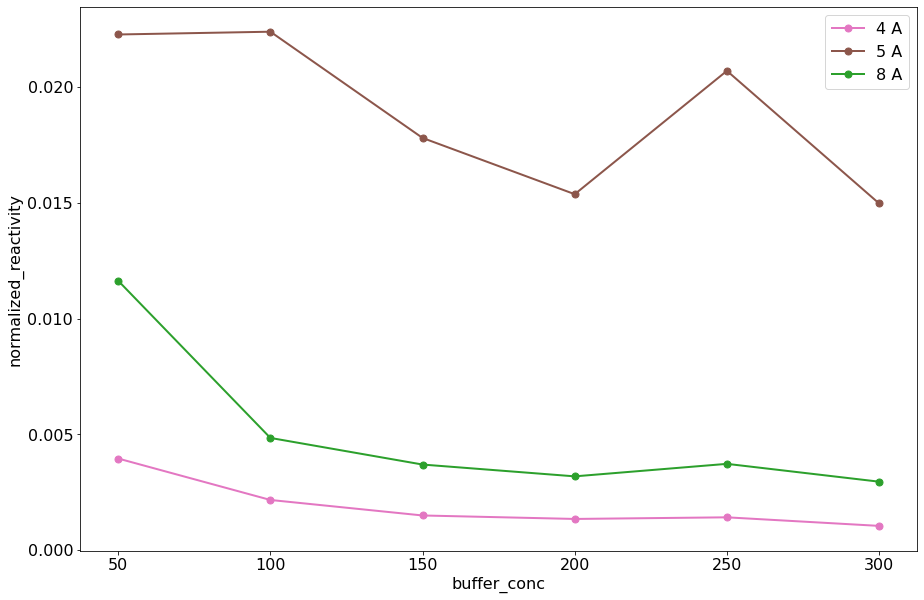

In [12]:
q1 = df["exp_name"] == "2022_07_25_C0117_NaC_Hep_titra_CM_BL"
q2 = df['buffer'] == 'Hepes'
df_sub = df[q1 & q2]
plot_tlr_res_against_buffer_conc(df_sub)

## kink turn titrations

In [13]:
def plot_res_against_mg2_conc(df, data_col, seq):
    bounds = [0, len(df.iloc[0][data_col])]
    #pal = sns.color_palette("tab10", 11)[::-1]
    #colors = pal
    for i in range(bounds[0], bounds[1]):
        # not DMS active
        seq_pos = seq[i]
        if seq_pos == 'G' or seq_pos == 'U':
            continue
            
        plt.plot(df_sub["mg_conc"], df_sub[data_col].apply(lambda x : x[i]),
                 lw=2, marker='o', markersize=7, 
                 label=str(i) + " " + seq_pos)
    plt.legend()
    plt.xlabel("mg_conc")
    plt.ylabel("normalized_reactivity")

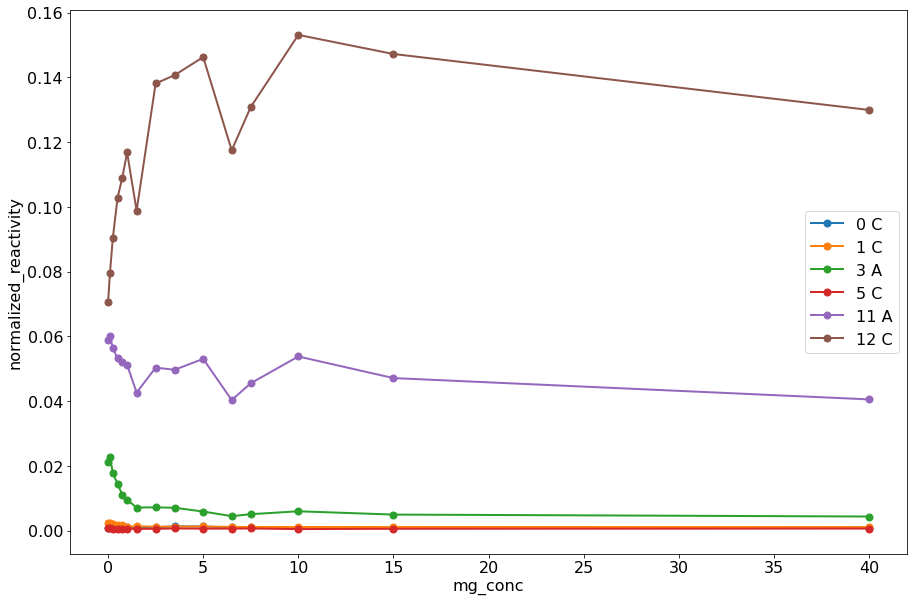

In [14]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "kink_turn_data", "CCGAGCGUUUGACG")

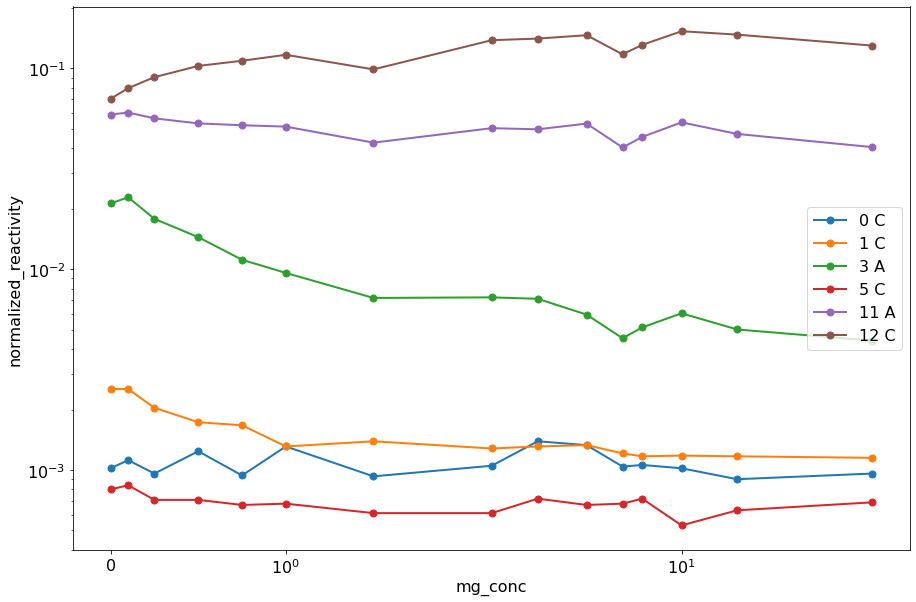

In [15]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "kink_turn_data", "CCGAGCGUUUGACG")
plt.xscale('symlog')
plt.yscale('log')

## ires titrations

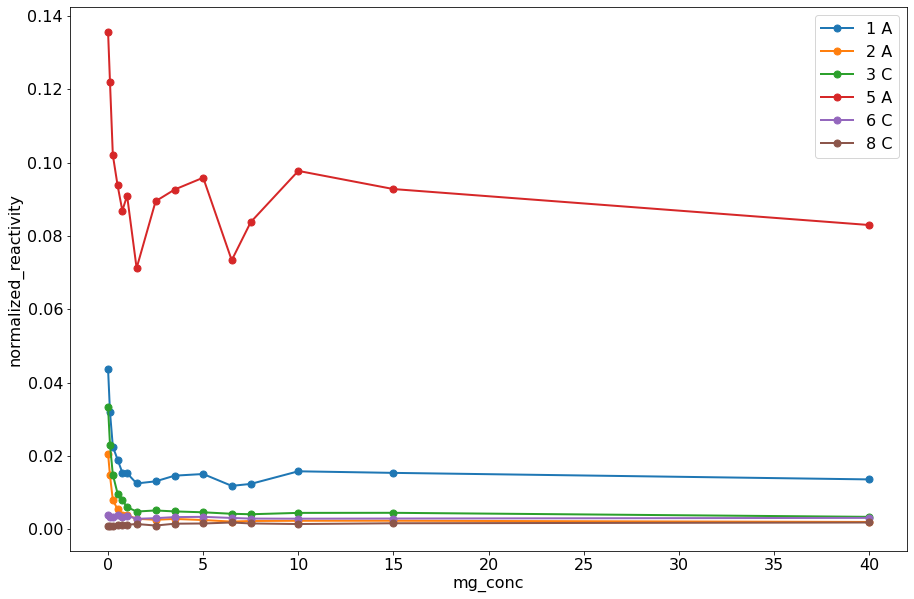

In [16]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "ires_data", "GAACUACGC")

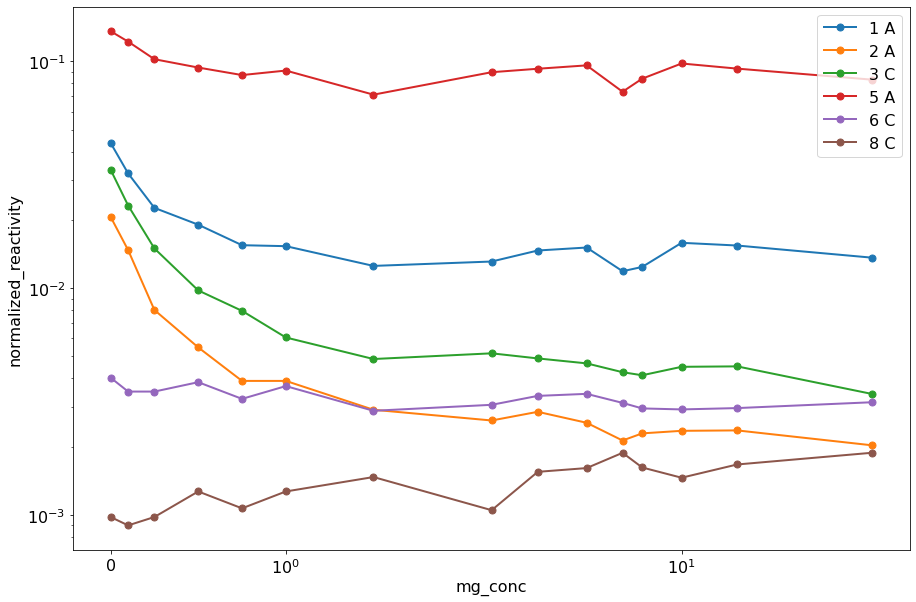

In [17]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "ires_data", "GAACUACGC")
plt.xscale('symlog')
plt.yscale('log')

## 3x3 motif titrations

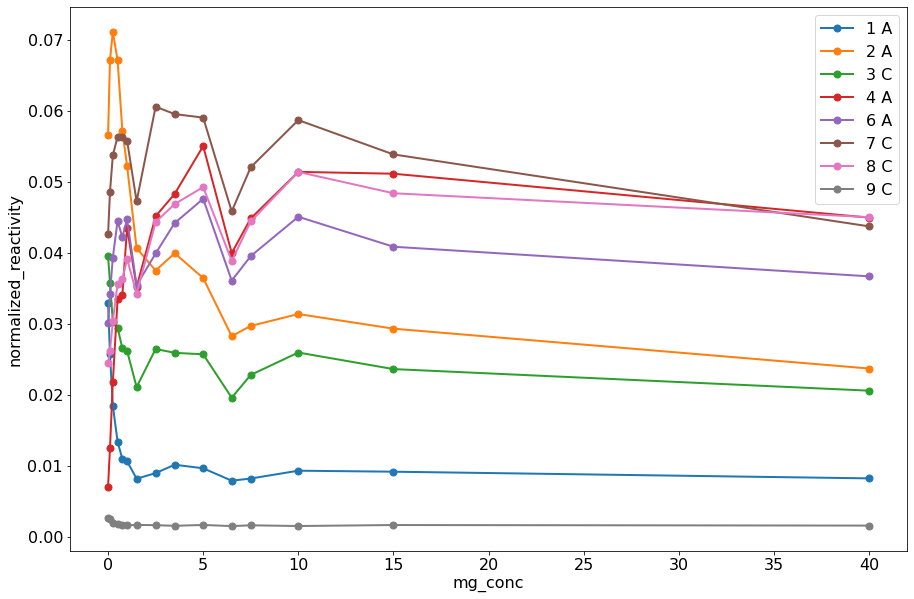

In [18]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "3_x_3_data", "GAACAUACCC")

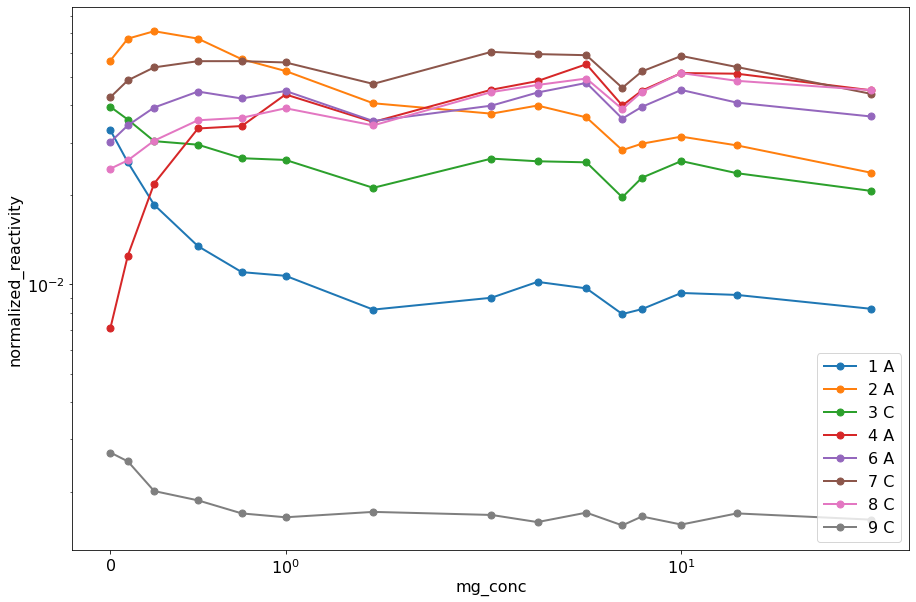

In [19]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "3_x_3_data", "GAACAUACCC")
plt.xscale('symlog')
plt.yscale('log')